#            Housing Price Predictor

In [ ]:
   ###########    #############   Features of Housing Data   ################     ############
    
       1. CRIM      per capita crime rate by town
       2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
       3. INDUS     proportion of non-retail business acres per town
       4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
       5. NOX       nitric oxides concentration (parts per 10 million)
       6. RM        average number of rooms per dwelling
       7. AGE       proportion of owner-occupied units built prior to 1940
       8. DIS       weighted distances to five Boston employment centres
       9. RAD       index of accessibility to radial highways
      10. TAX       full-value property-tax rate per $10,000
      11. PTRATIO   pupil-teacher ratio by town
      12. B         1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
      13. LSTAT     % lower status of the population
      14. MEDV      Median value of owner-occupied homes in $1000's

In [10]:
#  Importing the Required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly as pl
import seaborn as sns
#import pandas-profiling
import sweetviz as sz

import sklearn

In [73]:
# loading dataset
housing = pd.read_csv('Housing dataset.csv')
housing

,CRIME RATE,ZONE,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATUO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [75]:
#  Getting info for Housing dataset
housing.info()

#  We use this info() method to get additional information of dataset and specifically we try to observe
#    presence of missing or NA values in dataset.

 #  Since There are no any missing values available and if there would be any, then we try to remove them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIME RATE  506 non-null    float64
 1   ZONE        506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    int64  
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    int64  
 9   TAX         506 non-null    int64  
 10  PTRATUO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [76]:
#  since Chas is a dummy variable or a boolean variable and has only 2 features
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [77]:
#  Getting description of overall dataset
housing.describe()

,CRIME RATE,ZONE,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATUO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000278ECAB9940>,
      dtype=object)

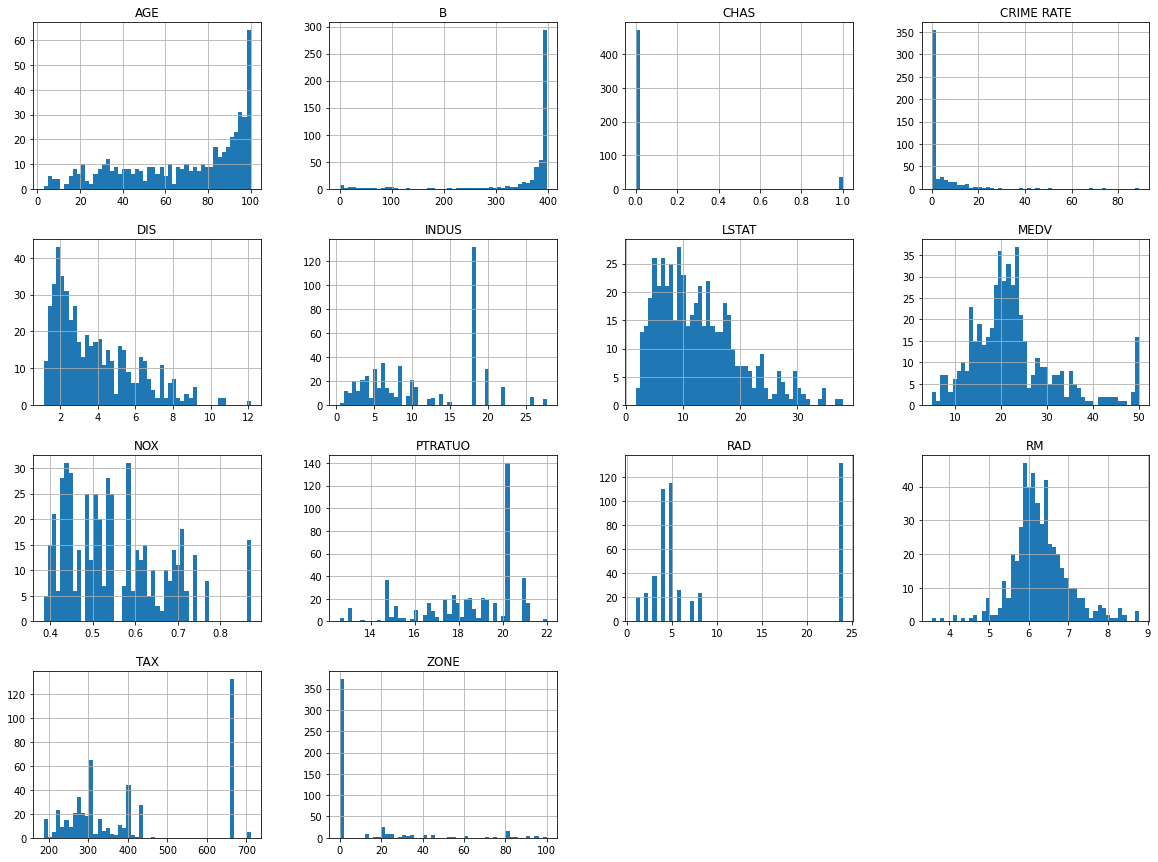

In [79]:
# Plotting histogram of dataset
housing.hist(bins=50, figsize= (20, 15))